<a href="https://colab.research.google.com/github/milydiazmarquez605-wq/Estadistica2025B/blob/main/Problemario_U4_Mily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
#Mily Díaz de León Márquez
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),69.5,3.0,9.423729,0.001771
Residual,29.5,12.0,NaN,NaN


valor-p (Shapiro) = 0.2808008139238357


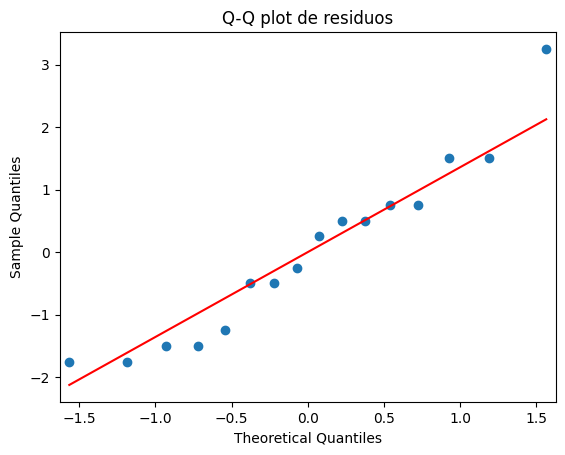

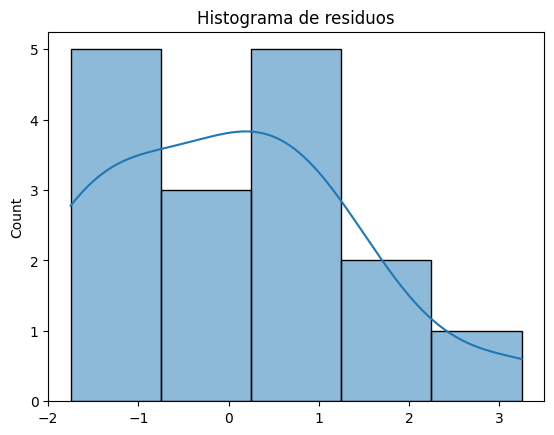

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.4485146502776487


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

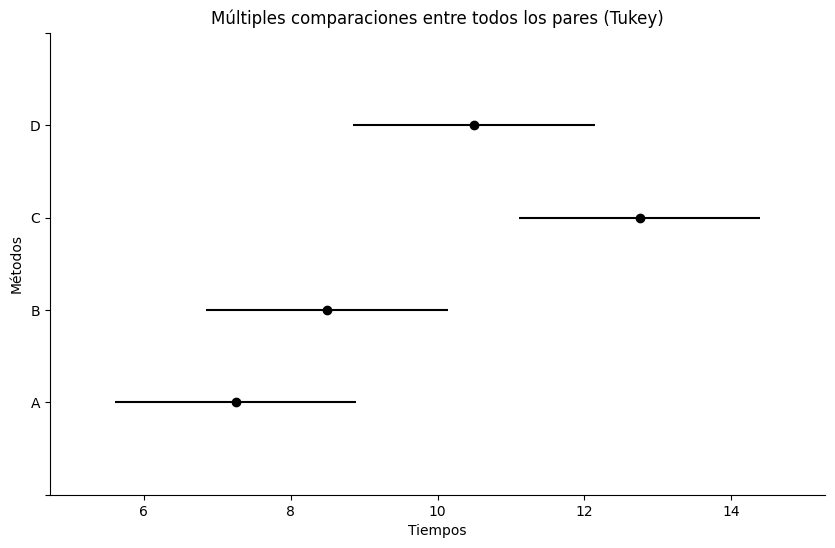

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Métodos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: -0.2809888705290132


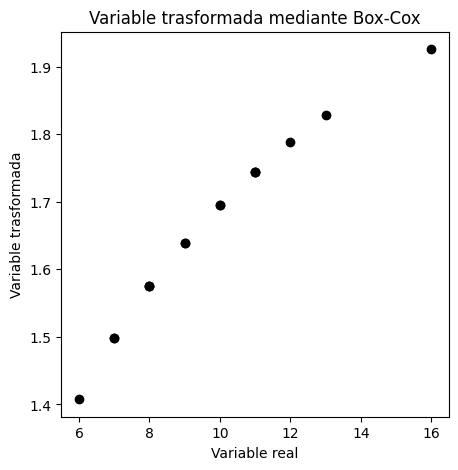

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),0.202435,3.0,10.789983,0.001006
Residual,0.075046,12.0,NaN,NaN


valor-p (Shapiro) = 0.5124442012773083


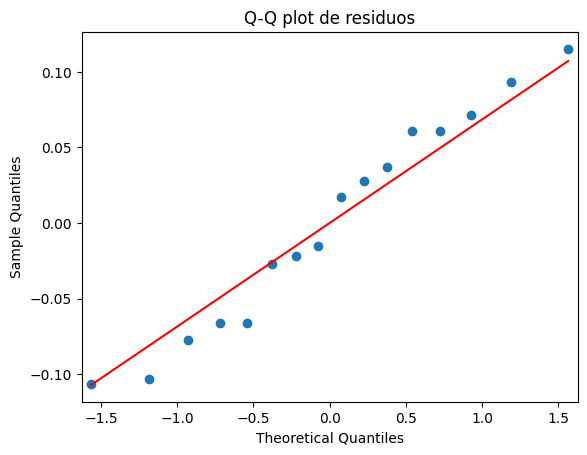

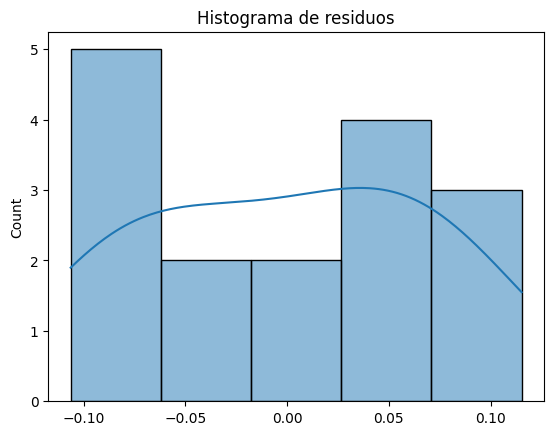

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['respuesta_boxcox']
grupo2 = df[df['metodo'] == 'B']['respuesta_boxcox']
grupo3 = df[df['metodo'] == 'C']['respuesta_boxcox']
grupo4 = df[df['metodo'] == 'D']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9372028709850322


Lambda óptimo: -0.2809888705290132


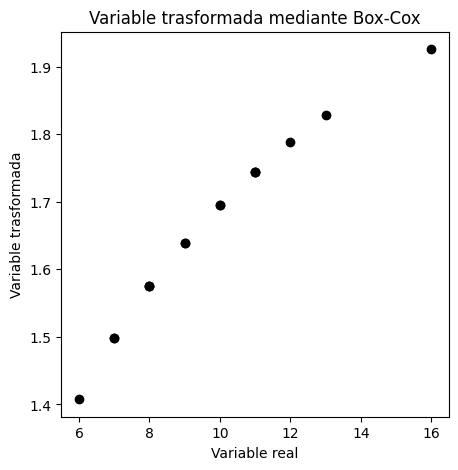

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

**Conclusión:**
El análisis estadístico mostró que existen diferencias claras en los tiempos de ensamble entre los cuatro métodos estudiados. Con el ANOVA se comprobó que al menos uno de ellos se comporta de manera distinta a los demás, y además se confirmó que se cumplen los supuestos de normalidad y homogeneidad de varianzas. La prueba post-hoc de Tukey indicó que el método C presenta los tiempos más altos, siendo significativamente más lento en comparación con los métodos A y B. Aunque entre los métodos A, B y D no se observaron diferencias estadísticas relevantes, los resultados señalan que A y B mantienen una ligera ventaja en cuanto a eficiencia.

En función de estos resultados, el método C no es recomendable cuando se busca reducir el tiempo de ensamble. Por el contrario, los métodos A y B se perfilan como las opciones más eficientes y pueden tomarse como base para estandarizar el proceso.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Datos para el problema 2
datos_problema_2 = '''
tipo_de_cuero,observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df2 = pd.read_csv(StringIO(datos_problema_2))
df2


,tipo_de_cuero,observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [ ]:
#Mily Díaz de León Márquez
# Nivel de significancia = 0.05
# H0: Todos los tipos de cueros tienen el mismo desgaste
# H1: Al menos uno tiene un desgaste distinto

# Realizar el modelo ANOVA
modelo_lineal_p2 = ols('observaciones ~ C(tipo_de_cuero)', data=df2).fit()
tabla_anova_p2 = sm.stats.anova_lm(modelo_lineal_p2, typ=2)
tabla_anova_p2

,sum_sq,df,F,PR(>F)
C(tipo_de_cuero),7019.458333,3.0,22.755356,0.000001
Residual,2056.500000,20.0,NaN,NaN


valor-p (Shapiro) = 0.00967014513830024


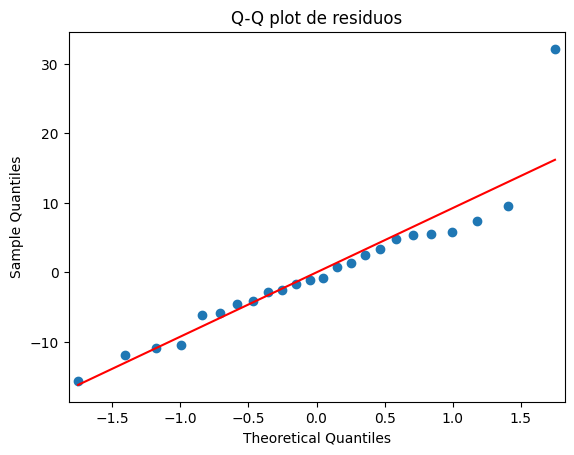

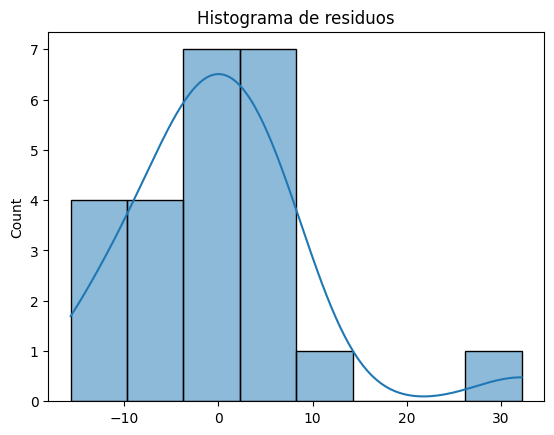

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal_p2.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df2[df2['tipo_de_cuero'] == 'A']['observaciones']
grupo2 = df2[df2['tipo_de_cuero'] == 'B']['observaciones']
grupo3 = df2[df2['tipo_de_cuero'] == 'C']['observaciones']
grupo4 = df2[df2['tipo_de_cuero'] == 'D']['observaciones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.6351342635286297


Lambda óptimo: -3.707788382033557


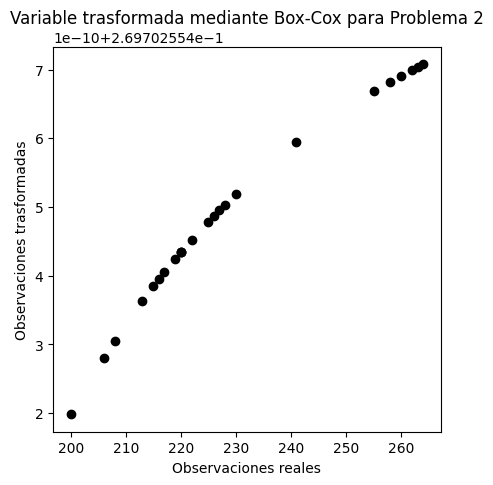

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df2["observaciones_boxcox"], lambda_opt = boxcox(df2["observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df2["observaciones"], df2["observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox para Problema 2")
plt.xlabel("Observaciones reales")
plt.ylabel("Observaciones trasformadas")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias de desgaste (transformado) son iguales para los diferentes tipos de cuero.
# H1: Al menos una media de desgaste (transformado) es distinta para los tipos de cuero.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'observaciones_boxcox ~ C(tipo_de_cuero)', data=df2).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tipo_de_cuero),3.735519e-19,3.0,23.368221,9.595697e-07
Residual,1.065698e-19,20.0,NaN,NaN


valor-p (Shapiro) = 0.4576953738713335


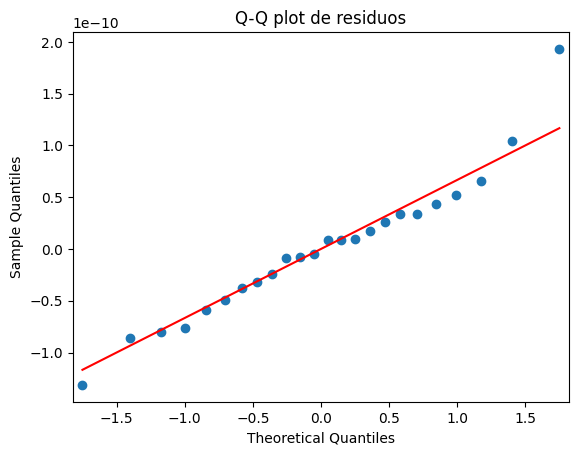

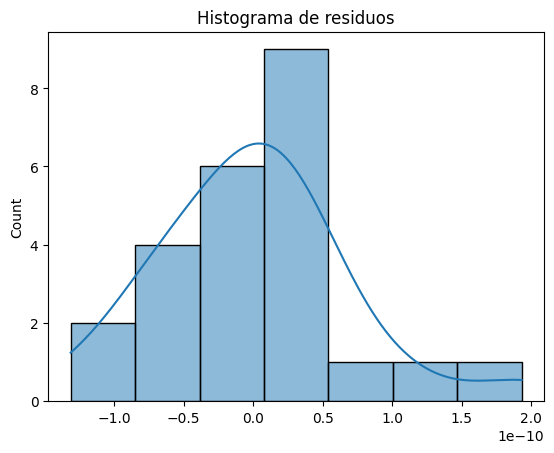

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df2[df2['tipo_de_cuero'] == 'A']['observaciones_boxcox']
grupo2 = df2[df2['tipo_de_cuero'] == 'B']['observaciones_boxcox']
grupo3 = df2[df2['tipo_de_cuero'] == 'C']['observaciones_boxcox']
grupo4 = df2[df2['tipo_de_cuero'] == 'D']['observaciones_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.3428159311494669


Lambda óptimo: -3.707788382033557


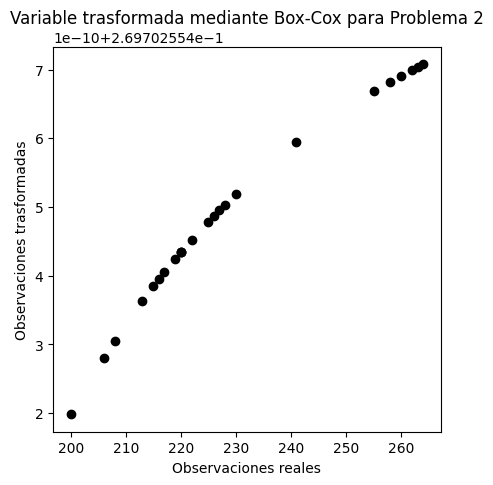

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df2["observaciones_boxcox"], lambda_opt = boxcox(df2["observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df2["observaciones"], df2["observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox para Problema 2")
plt.xlabel("Observaciones reales")
plt.ylabel("Observaciones trasformadas")
plt.show()

**Conclusión:**
El estudio evidenció diferencias marcadas en el desgaste entre los distintos tipos de cuero empleados en suelas. Al inicio no se cumplía el supuesto de normalidad, por lo que fue necesario aplicar una transformación Box–Cox; después de realizarla, los supuestos estadísticos se ajustaron adecuadamente. Con ello, el ANOVA confirmó la existencia de diferencias significativas y, mediante la prueba de Tukey, se identificó que el cuero A presenta el mayor desgaste, mientras que el cuero B destaca por su mejor comportamiento, reflejando las menores pérdidas de material. Por su parte, los cueros C y D mostraron valores intermedios sin diferencias significativas entre sí.

Considerando estos resultados, la empresa debería optar por el cuero tipo B para mejorar la resistencia al desgaste de sus suelas, ya que este material ofrece una durabilidad notablemente superior en comparación con los demás tipos evaluados.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

datos = '''
tratamiento,tiempo_coccion
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''

df= pd.read_csv(StringIO(datos))
df

,tratamiento,tiempo_coccion
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo_coccion ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),95041.250000,3.0,1558.966022,1.260640e-27
Residual,487.714286,24.0,NaN,NaN


valor-p (Shapiro) = 0.34689165649616827


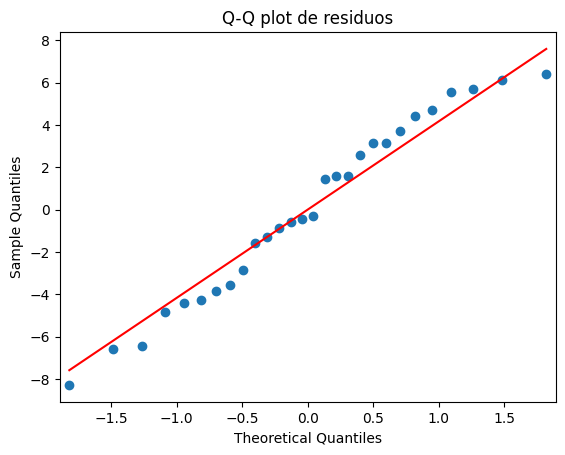

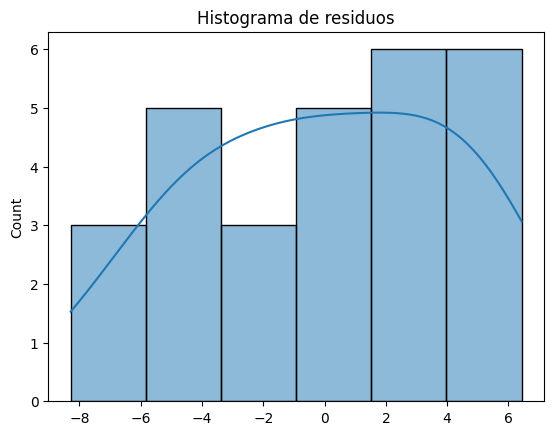

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct column names for problem 3
grupo1 = df[df['tratamiento'] == 'T1']['tiempo_coccion']
grupo2 = df[df['tratamiento'] == 'T2']['tiempo_coccion']
grupo3 = df[df['tratamiento'] == 'T3']['tiempo_coccion']
grupo4 = df[df['tratamiento'] == 'T4']['tiempo_coccion']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9201477397132211


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

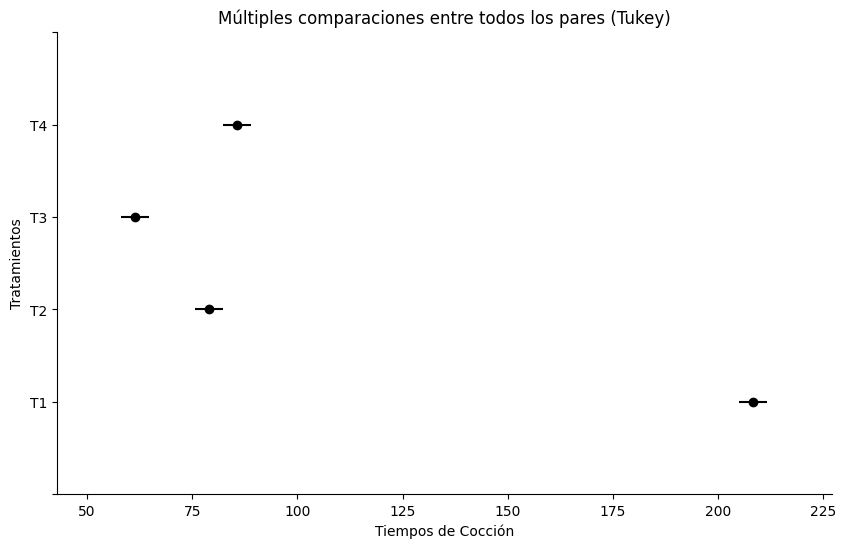

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo_coccion'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamientos", xlabel="Tiempos de Cocción")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**Conclusión:**
El análisis mostró diferencias claras entre los cuatro tratamientos evaluados. El control (T1) registró los tiempos de cocción más elevados, mientras que los tratamientos con sal, bicarbonato y la combinación de ambos lograron reducciones importantes. La prueba de Tukey confirmó que cualquier tratamiento supera de manera significativa al no aplicar intervención alguna; aun así, los tratamientos con sal (T3) y la mezcla (T4) destacan por ofrecer resultados más estables. Además, los supuestos estadísticos se cumplieron, lo que respalda la solidez del modelo.

En conjunto, todos los tratamientos contribuyen a disminuir de forma notable el tiempo de cocción, aunque T3 y T4 se posicionan como las opciones más eficientes. Por ello, se recomienda considerar alguno de estos dos para optimizar el proceso culinario.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [ ]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

datos = '''
temperatura,intensidad
20,15
20,18
20,13
20,12
40,17
40,21
40,11
40,16
60,23
60,19
60,25
60,22
80,28
80,32
80,34
80,31
100,45
100,51
100,57
100,48
'''
df4 = pd.read_csv(StringIO(datos))
df4.reset_index(drop=True, inplace=True)
df4

,temperatura,intensidad
0,20,15
1,20,18
2,20,13
3,20,12
4,40,17
5,40,21
6,40,11
7,40,16
8,60,23
9,60,19


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: No hay diferencia con los combos de temperatura
# H1: Al menos una temperatura provoca un deterioro diferente

# Realizar el modelo ANOVA
modelo_lineal = ols(f'intensidad ~ C(temperatura)', data=df4).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(temperatura),3411.8,4.0,68.054521,1.963480e-09
Residual,188.0,15.0,NaN,NaN


valor-p (Shapiro) = 0.7785351257478148


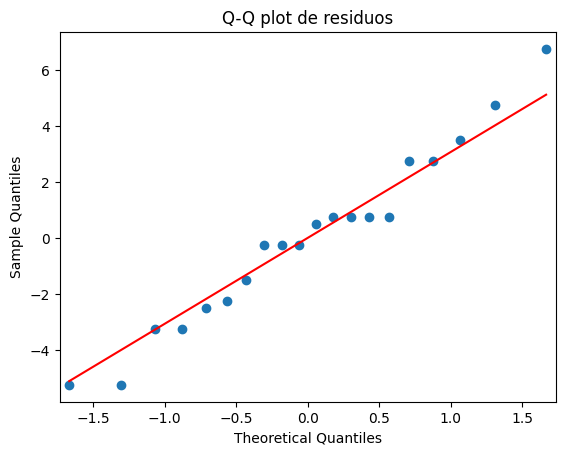

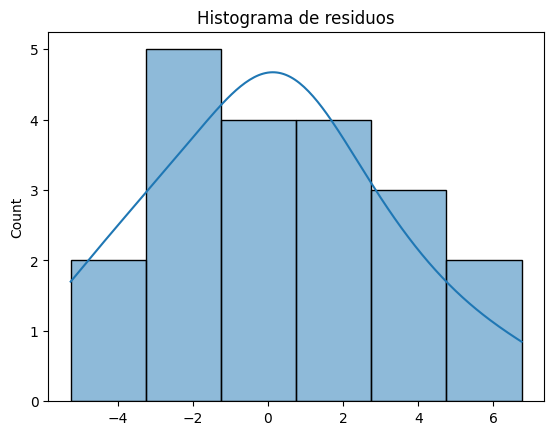

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 4
grupo1 = df4[df4['temperatura'] == 20]['intensidad']
grupo2 = df4[df4['temperatura'] == 40]['intensidad']
grupo3 = df4[df4['temperatura'] == 60]['intensidad']
grupo4 = df4[df4['temperatura'] == 80]['intensidad']
grupo5 = df4[df4['temperatura'] == 100]['intensidad']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.6159602096484009


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    20     40     1.75 0.9535 -5.9801  9.4801  False
    20     60     7.75 0.0493  0.0199 15.4801   True
    20     80    16.75 0.0001  9.0199 24.4801   True
    20    100    35.75    0.0 28.0199 43.4801   True
    40     60      6.0 0.1696 -1.7301 13.7301  False
    40     80     15.0 0.0002  7.2699 22.7301   True
    40    100     34.0    0.0 26.2699 41.7301   True
    60     80      9.0 0.0191  1.2699 16.7301   True
    60    100     28.0    0.0 20.2699 35.7301   True
    80    100     19.0    0.0 11.2699 26.7301   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones de Intensidad entre Temperaturas (Tukey)')

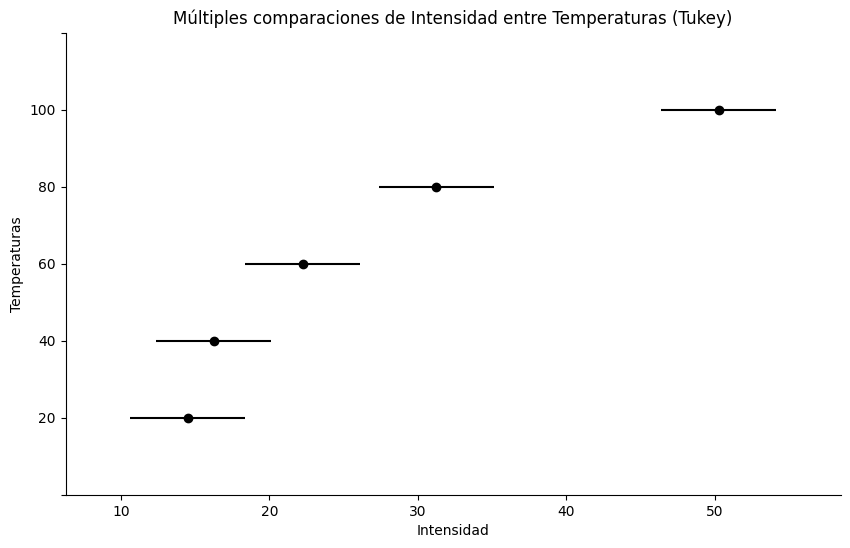

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df4['intensidad'], groups=df4['temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Temperaturas", xlabel="Intensidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Intensidad entre Temperaturas (Tukey)")

**Concluón:**
El ANOVA mostró diferencias significativas en la intensidad de corriente, evidenciando un incremento conforme aumenta la temperatura aplicada, lo que sugiere un deterioro más acelerado del módulo electrónico. La prueba de Tukey confirmó que las temperaturas de 80 °C y, sobre todo, 100 °C generan intensidades considerablemente mayores en comparación con las temperaturas más bajas. Además, los supuestos estadísticos se cumplieron, lo que refuerza la validez del patrón ascendente observado.

Dado que la temperatura influye directamente en el deterioro de los tableros, es recomendable evitar operar por encima de los 60 °C. A temperaturas de 80 °C y 100 °C, el daño aumenta de forma notable, comprometiendo la vida útil del componente.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [1]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje_defectuoso
Con tratam.,5.3
Con tratam.,4.0
Con tratam.,4.0
Con tratam.,4.0
Con tratam.,2.6
Con tratam.,2.1
Con tratam.,5.1
Con tratam.,4.1
Con tratam.,4.1
Con tratam.,3.2
Con tratam.,5.1
Con tratam.,2.2
Con tratam.,4.1
Sin tratam.,8.0
Sin tratam.,13.2
Sin tratam.,7.2
Sin tratam.,8.2
Sin tratam.,9.1
Sin tratam.,6.7
Sin tratam.,12.6
Sin tratam.,16.3
Sin tratam.,9.2
Sin tratam.,6.4
Sin tratam.,7.2
Sin tratam.,17.2
Sin tratam.,12.3
'''
df5 = pd.read_csv(StringIO(datos))
df5

,tratamiento,porcentaje_defectuoso
0,Con tratam.,5.3
1,Con tratam.,4.0
2,Con tratam.,4.0
3,Con tratam.,4.0
4,Con tratam.,2.6
5,Con tratam.,2.1
6,Con tratam.,5.1
7,Con tratam.,4.1
8,Con tratam.,4.1
9,Con tratam.,3.2


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: No hay diferencia significativa entre el porcentaje de producto defectuoso de los dos tratamientos.
# H1: Hay una diferencia significativa entre el porcentaje de producto defectuoso de los dos tratamientos.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'porcentaje_defectuoso ~ C(tratamiento)', data=df5).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),269.449615,1.0,37.102806,0.000003
Residual,174.293846,24.0,NaN,NaN


valor-p (Shapiro) = 0.08240142335256262


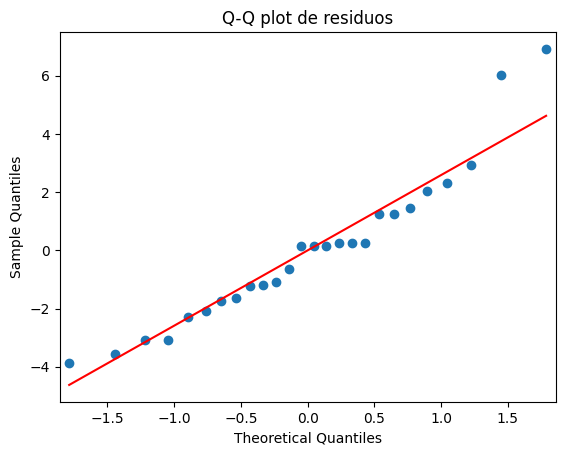

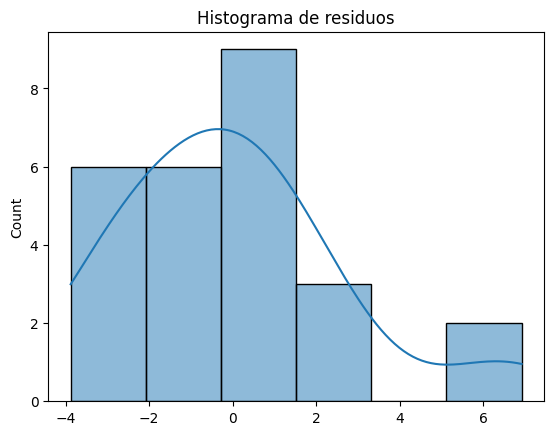

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 5
grupo1 = df5[df5['tratamiento'] == 'Con tratam.']['porcentaje_defectuoso']
grupo2 = df5[df5['tratamiento'] == 'Sin tratam.']['porcentaje_defectuoso']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.006953158590874458


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper reject
----------------------------------------------------------
Con tratam. Sin tratam.   6.4385   0.0 4.2569  8.62   True
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre los tratamientos (Tukey)')

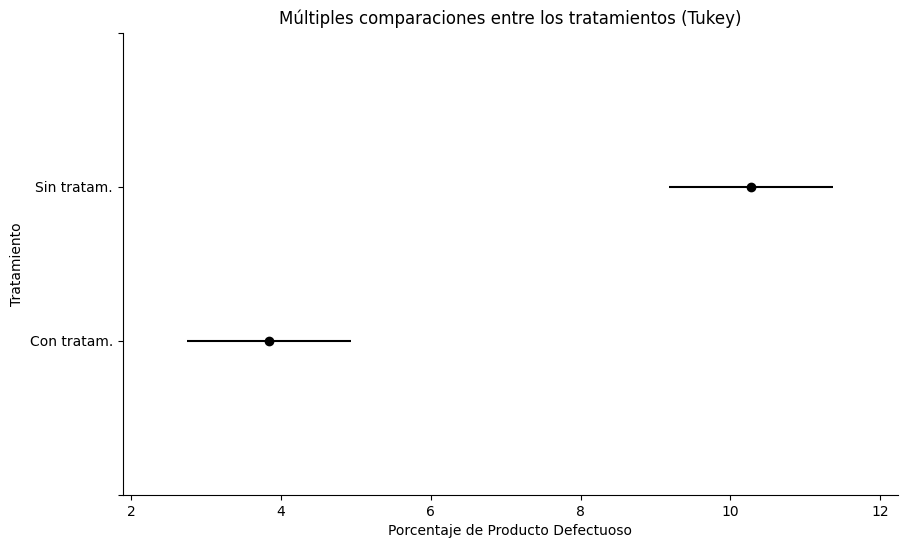

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df5['porcentaje_defectuoso'], groups=df5['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamiento", xlabel="Porcentaje de Producto Defectuoso")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre los tratamientos (Tukey)")

Lambda óptimo: -0.05387226813423122


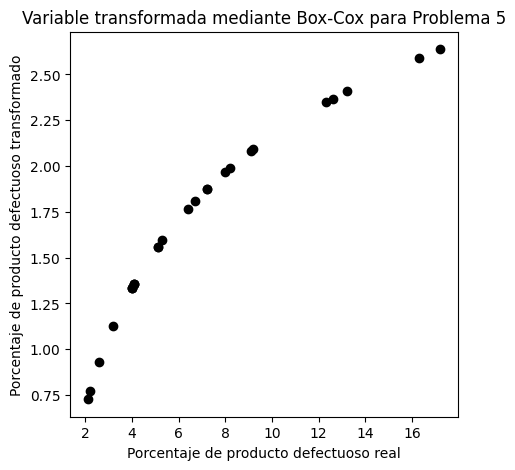

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df5["respuesta_boxcox"], lambda_opt = boxcox(df5["porcentaje_defectuoso"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df5["porcentaje_defectuoso"], df5["respuesta_boxcox"], color = "black")
plt.title("Variable transformada mediante Box-Cox para Problema 5")
plt.xlabel("Porcentaje de producto defectuoso real")
plt.ylabel("Porcentaje de producto defectuoso transformado")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: No hay diferencia significativa en el porcentaje de producto defectuoso (transformado) entre los dos tratamientos.
# H1: Hay una diferencia significativa en el porcentaje de producto defectuoso (transformado) entre los dos tratamientos.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'respuesta_boxcox ~ C(tratamiento)', data=df5).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),5.040324,1.0,58.843753,6.583032e-08
Residual,2.055745,24.0,NaN,NaN


valor-p (Shapiro) = 0.5855089546322916


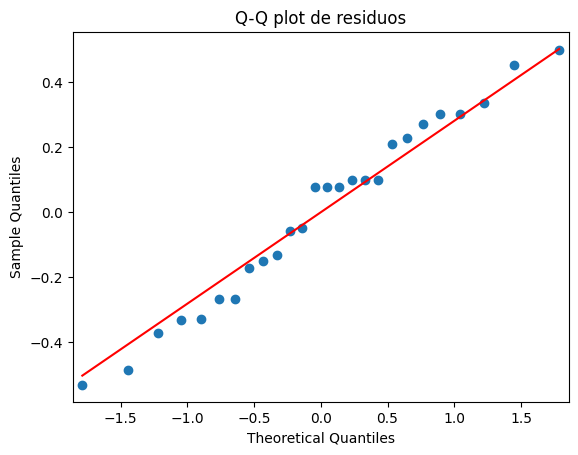

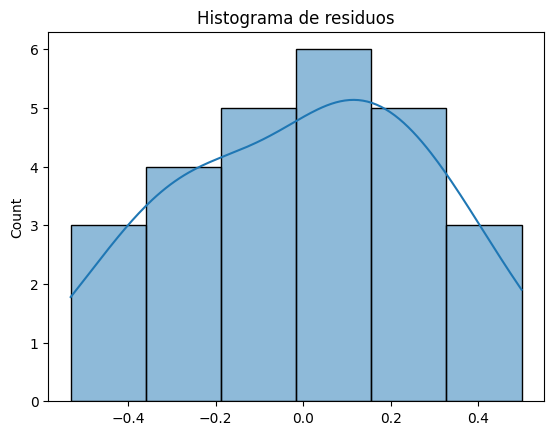

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 5
grupo1 = df5[df5['tratamiento'] == 'Con tratam.']['respuesta_boxcox']
grupo2 = df5[df5['tratamiento'] == 'Sin tratam.']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.5435742179927381


Lambda óptimo: -0.05387226813423122


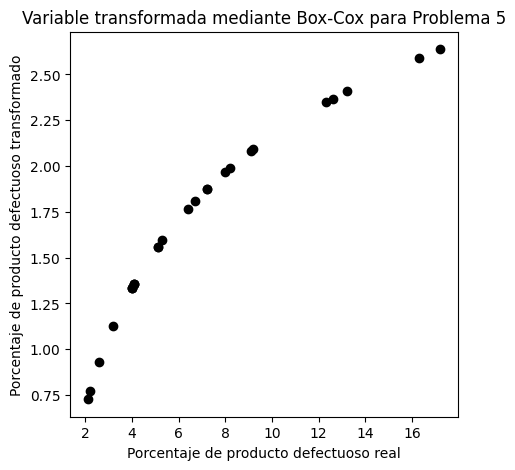

In [2]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df5["respuesta_boxcox"], lambda_opt = boxcox(df5["porcentaje_defectuoso"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df5["porcentaje_defectuoso"], df5["respuesta_boxcox"], color = "black")
plt.title("Variable transformada mediante Box-Cox para Problema 5")
plt.xlabel("Porcentaje de producto defectuoso real")
plt.ylabel("Porcentaje de producto defectuoso transformado")
plt.show()

**Conclusión:**
Los resultados evidenciaron una diferencia significativa entre los lotes fabricados con tratamiento y aquellos sin intervención. Los porcentajes de defectos se mantienen consistentemente más bajos cuando el tratamiento es aplicado. Aunque inicialmente no se cumplía el supuesto de homogeneidad de varianzas, la transformación Box–Cox permitió ajustar adecuadamente el modelo. Posteriormente, la prueba de Tukey confirmó que la diferencia entre ambos grupos es altamente significativa.

En conjunto, los hallazgos muestran que el tratamiento propuesto resulta efectivo para disminuir el porcentaje de productos defectuosos. Su implementación contribuirá a mejorar la calidad del producto final y a reducir el desperdicio, por lo que se recomienda incorporarlo de forma permanente en el proceso.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [ ]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

datos = '''
%_de_almidon,dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1
'''
df6 = pd.read_csv(StringIO(datos))
df6.rename(columns={'%_de_almidon': 'porcentaje_almidon'}, inplace=True)
df6

,porcentaje_almidon,dureza
0,2,4.3
1,2,5.2
2,2,4.8
3,2,4.5
4,5,6.5
5,5,7.3
6,5,6.9
7,5,6.1
8,10,9.0
9,10,7.8


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias de dureza son iguales para los diferentes porcentajes de almidón.
# H1: Al menos una media de dureza es diferente para los porcentajes de almidón.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'dureza ~ C(porcentaje_almidon)', data=df6).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(porcentaje_almidon),26.726667,2.0,58.101449,0.000007
Residual,2.070000,9.0,NaN,NaN


valor-p (Shapiro) = 0.42952068080371164


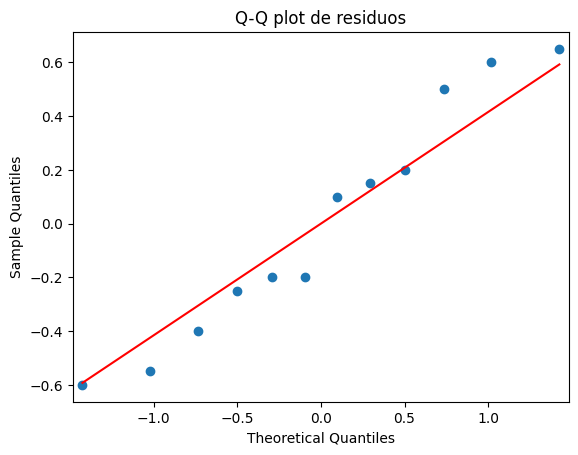

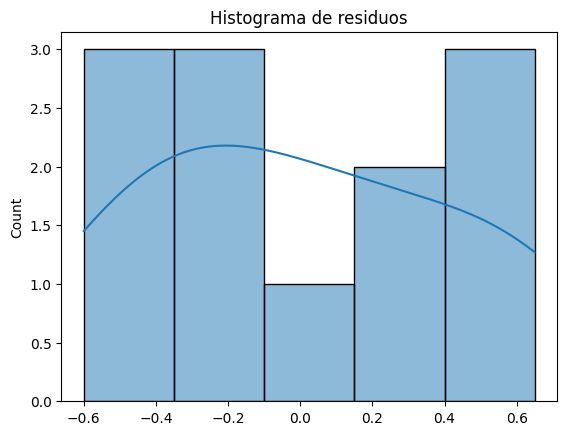

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 6
grupo1 = df6[df6['porcentaje_almidon'] == 2]['dureza']
grupo2 = df6[df6['porcentaje_almidon'] == 5]['dureza']
grupo3 = df6[df6['porcentaje_almidon'] == 10]['dureza']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.771773370798543


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5      2.0 0.0006 1.0532 2.9468   True
     2     10     3.65    0.0 2.7032 4.5968   True
     5     10     1.65 0.0023 0.7032 2.5968   True
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones de Dureza entre Porcentajes de Almidón (Tukey)')

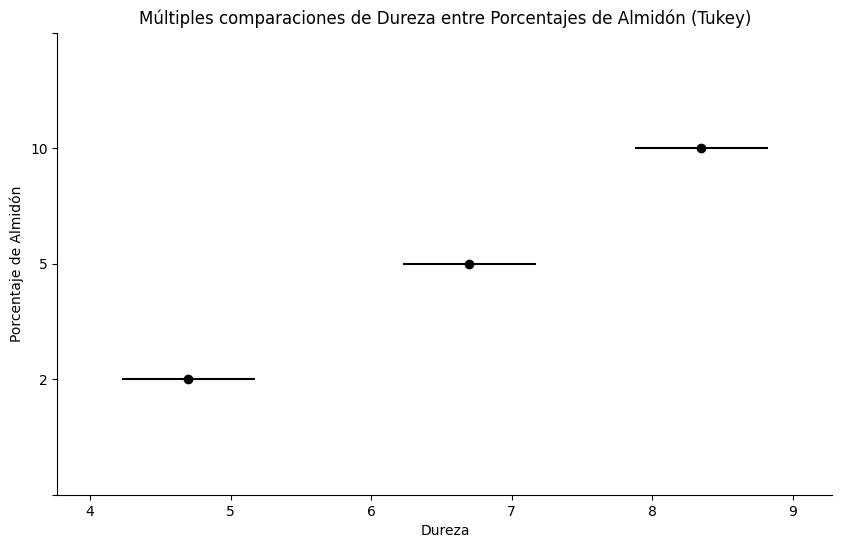

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df6['dureza'], groups=df6['porcentaje_almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Porcentaje de Almidón", xlabel="Dureza")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Dureza entre Porcentajes de Almidón (Tukey)")

**Conclusión:**
El estudio confirmó que el porcentaje de almidón influye de manera directa y significativa en la dureza de las tabletas. Los resultados muestran un incremento claro en la resistencia conforme aumenta la cantidad de almidón, destacando el nivel del 10% como el que genera las tabletas con mayor dureza. Los supuestos estadísticos se cumplieron adecuadamente y la prueba de Tukey verificó diferencias significativas entre los tres niveles evaluados.

En consecuencia, el nivel de 10% de almidón es el más apropiado cuando se busca obtener tabletas con una mayor dureza, aspecto especialmente importante en procesos donde se requiere mayor cohesión y resistencia mecánica.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [ ]:
#Mily Díaz de León Márquez
import pandas as pd
from io import StringIO

datos = '''
nivel_nitrogeno,rendimiento
1,14.823
1,14.676
1,14.720
1,14.5141
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.460
3,32.256
3,32.669
3,32.111
'''

df7 = pd.read_csv(StringIO(datos))
df7.reset_index(drop=True, inplace=True)
df7

,nivel_nitrogeno,rendimiento
0,1,14.8230
1,1,14.6760
2,1,14.7200
3,1,14.5141
4,1,15.0650
5,2,25.1510
6,2,25.4010
7,2,25.1310
8,2,25.0310
9,2,25.2670


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias de rendimiento son iguales para los diferentes niveles de nitrógeno.
# H1: Al menos una media de rendimiento es diferente para los niveles de nitrógeno.

# Realizar el modelo ANOVA
modelo_lineal = ols('rendimiento ~ C(nivel_nitrogeno)', data=df7).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(nivel_nitrogeno),788.340773,2.0,10131.619332,4.298250e-20
Residual,0.466860,12.0,NaN,NaN


valor-p (Shapiro) = 0.8890610190283172


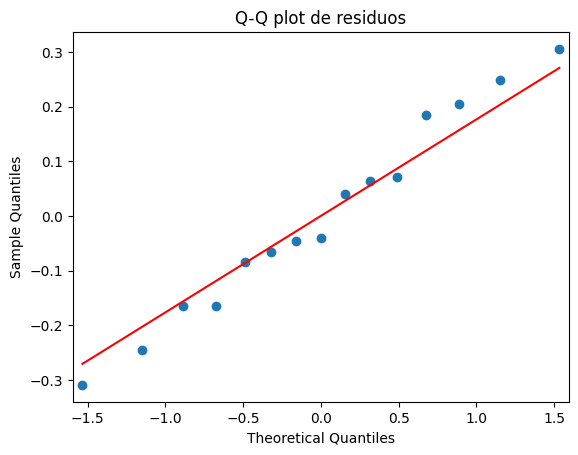

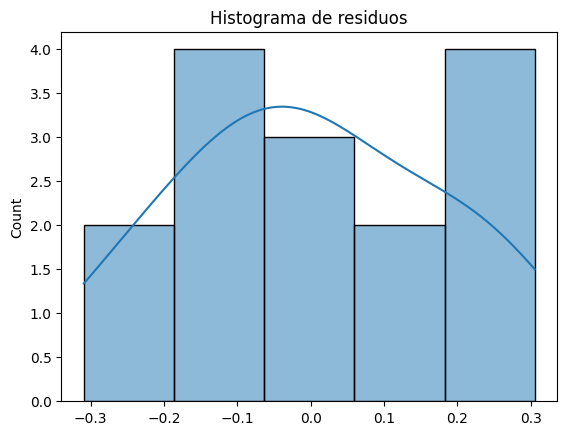

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 7
grupo1 = df7[df7['nivel_nitrogeno'] == 1]['rendimiento']
grupo2 = df7[df7['nivel_nitrogeno'] == 2]['rendimiento']
grupo3 = df7[df7['nivel_nitrogeno'] == 3]['rendimiento']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.5977763142684792


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  10.4366   0.0 10.1038 10.7694   True
     1      3  17.6606   0.0 17.3278 17.9934   True
     2      3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


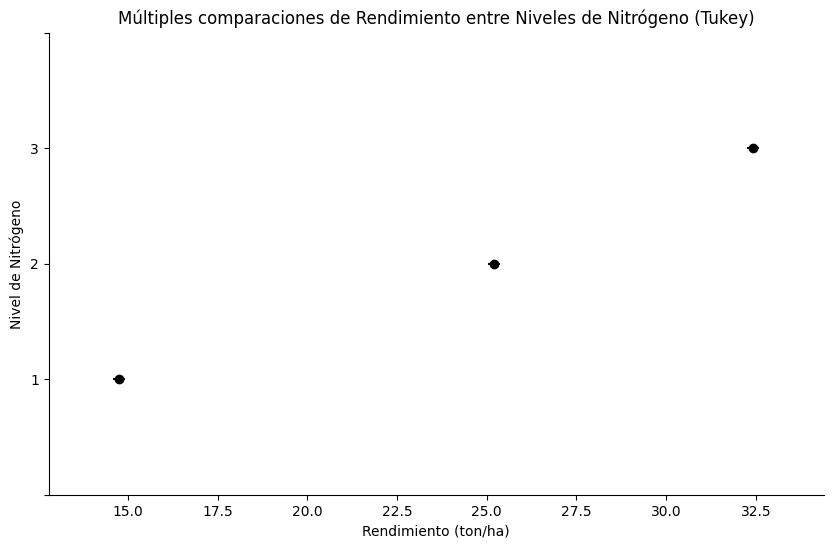

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df7['rendimiento'], groups=df7['nivel_nitrogeno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Nivel de Nitrógeno", xlabel="Rendimiento (ton/ha)")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Rendimiento entre Niveles de Nitrógeno (Tukey)")
plt.show()

**Conclusión:**
Los análisis evidenciaron diferencias altamente significativas entre los tres niveles de fertilización nitrogenada. Tanto el ANOVA como la prueba de Tukey confirmaron que el rendimiento del pasto aumenta de manera proporcional conforme se incrementa la cantidad de nitrógeno aplicada. El nivel 3 obtuvo los valores más altos y mostró además una notable consistencia entre las repeticiones.

Para optimizar el rendimiento del pasto, resulta recomendable emplear el nivel 3 de nitrógeno, ya que proporciona los mejores resultados sin afectar la estabilidad del cultivo.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [ ]:
#Mily Díaz de León Márquez
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
aglutinante,friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''
df8 = pd.read_csv(StringIO(datos))
df8

,aglutinante,friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA
modelo_lineal_p8 = ols(f'friabilidad ~ C(aglutinante)', data=df8).fit()
tabla_anova_p8 = sm.stats.anova_lm(modelo_lineal_p8, typ=2)
tabla_anova_p8

,sum_sq,df,F,PR(>F)
C(aglutinante),292.920971,2.0,4420.972597,6.198213e-18
Residual,0.397543,12.0,NaN,NaN


valor-p (Shapiro) = 0.8890610190283172


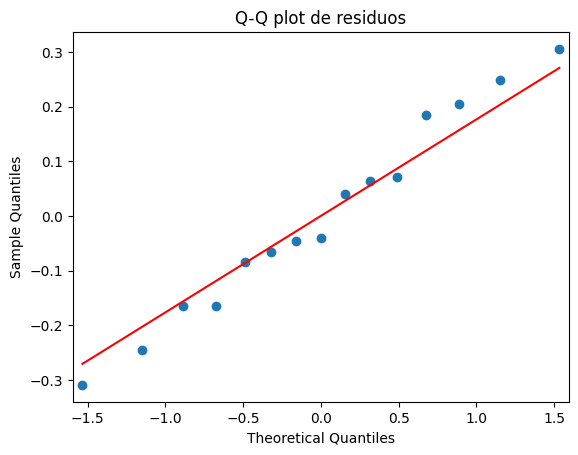

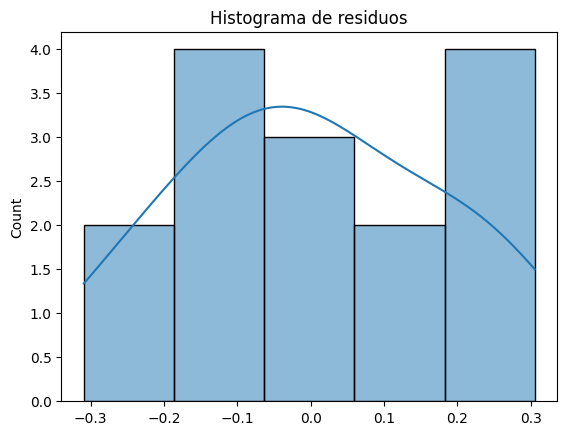

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 8
grupo1 = df8[df8['aglutinante'] == 'PVP']['friabilidad']
grupo2 = df8[df8['aglutinante'] == 'CMC']['friabilidad']
grupo3 = df8[df8['aglutinante'] == 'Gre']['friabilidad']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.8018412374552168


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones de Friabilidad entre Aglutinantes (Tukey)')

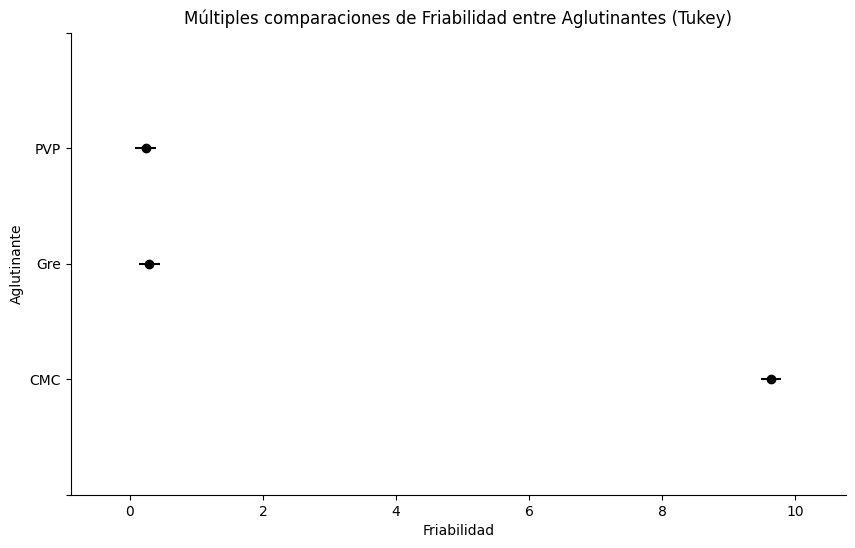

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df8['friabilidad'], groups=df8['aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Aglutinante", xlabel="Friabilidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Friabilidad entre Aglutinantes (Tukey)")

**Conclusión:**
Los resultados mostraron diferencias extremadamente significativas entre los aglutinantes evaluados. El aglutinante CMC presentó valores de friabilidad notablemente altos, lo que refleja una baja resistencia mecánica en las tabletas. En contraste, tanto PVP como grenetina registraron valores bajos y consistentes. La prueba de Tukey confirmó que la CMC es significativamente inferior, mientras que entre PVP y grenetina no se observaron diferencias estadísticas relevantes.

Dado su desempeño, la CMC no es adecuada como aglutinante para este tipo de tabletas debido a su elevada friabilidad. En su lugar, se recomienda utilizar PVP o grenetina, ya que ambos ofrecen resultados favorables y se mantienen dentro de los estándares aceptables de calidad.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [ ]:
#Mily Díaz de León Márquez
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
clona,porcentaje_azucares
1,8.69
1,6.68
1,6.83
1,6.43
1,10.30
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

df9 = pd.read_csv(StringIO(datos))
df9

,clona,porcentaje_azucares
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias de porcentaje de azúcares reductores son iguales para las diferentes clonas.
# H1: Al menos una media de porcentaje de azúcares reductores es diferente para las clonas.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'porcentaje_azucares ~ C(clona)', data=df9).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(clona),209.90716,3.0,12.327073,0.000198
Residual,90.81676,16.0,NaN,NaN


valor-p (Shapiro) = 0.7677173153296


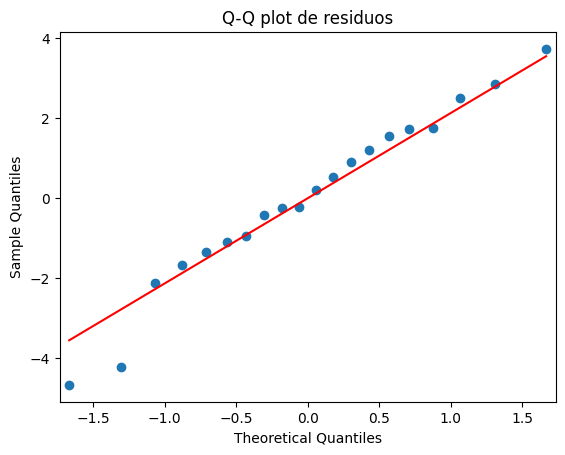

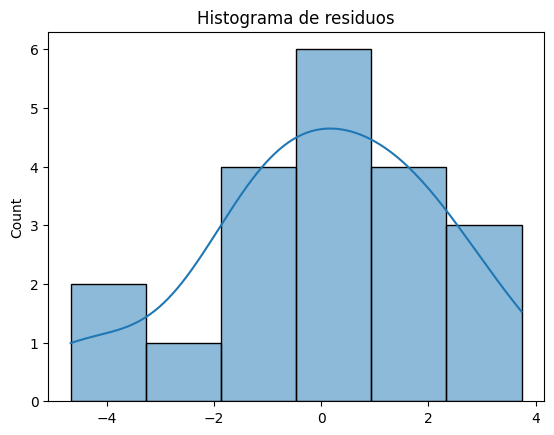

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 9
grupo1 = df9[df9['clona'] == 1]['porcentaje_azucares']
grupo2 = df9[df9['clona'] == 2]['porcentaje_azucares']
grupo3 = df9[df9['clona'] == 3]['porcentaje_azucares']
grupo4 = df9[df9['clona'] == 4]['porcentaje_azucares']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.4290096340206233


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones de Porcentaje de Azúcares Reductores Totales entre Clonas (Tukey)')

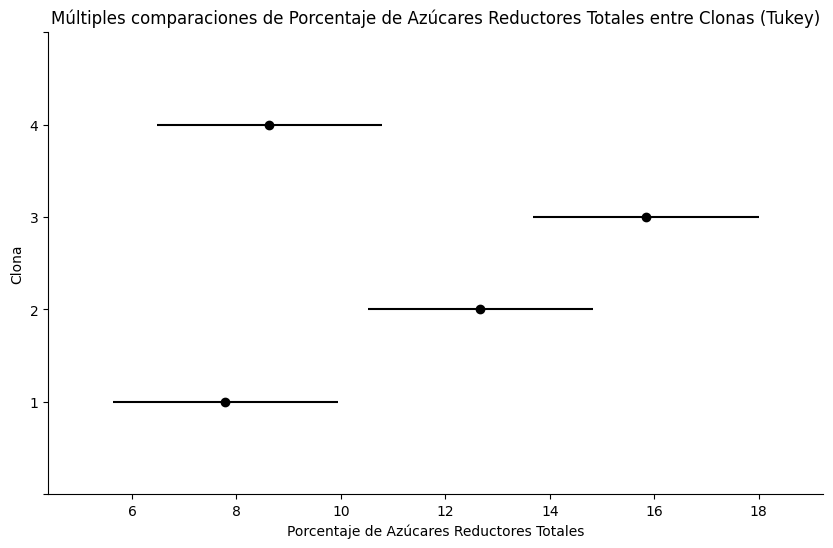

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df9['porcentaje_azucares'], groups=df9['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Clona", xlabel="Porcentaje de Azúcares Reductores Totales")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Porcentaje de Azúcares Reductores Totales entre Clonas (Tukey)")

**Conclusión:**
El ANOVA evidenció diferencias significativas entre las clonas, y la prueba de Tukey confirmó que la clona 3 presenta un contenido de azúcares reductores considerablemente mayor en comparación con las demás. Las clonas 1 y 4 registraron niveles bajos, mientras que la clona 2 se ubicó en un punto intermedio. Además, los supuestos estadísticos del modelo se cumplieron adecuadamente, respaldando la validez de los resultados.

En función de estos hallazgos, la clona 3 muestra una respuesta más eficiente al manejo y destaca por su mayor potencial industrial para la obtención de azúcares, por lo que se recomienda priorizarla en procesos productivos y de cultivo.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [ ]:
#Mily Díaz de León Márquez
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje_cometas
Con tratamiento,5.30
Con tratamiento,4.03
Con tratamiento,4.00
Con tratamiento,2.56
Con tratamiento,5.06
Con tratamiento,4.06
Con tratamiento,2.08
Con tratamiento,4.03
Con tratamiento,2.04
Con tratamiento,1.18
Sin tratamiento,8.02
Sin tratamiento,13.18
Sin tratamiento,7.15
Sin tratamiento,9.11
Sin tratamiento,8.23
Sin tratamiento,16.3
Sin tratamiento,9.20
Sin tratamiento,6.35
Sin tratamiento,7.15
Sin tratamiento,8.66
'''
df10 = pd.read_csv(StringIO(datos))
df10

,tratamiento,porcentaje_cometas
0,Con tratamiento,5.30
1,Con tratamiento,4.03
2,Con tratamiento,4.00
3,Con tratamiento,2.56
4,Con tratamiento,5.06
5,Con tratamiento,4.06
6,Con tratamiento,2.08
7,Con tratamiento,4.03
8,Con tratamiento,2.04
9,Con tratamiento,1.18


In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: No hay diferencia en el porcentaje de cometas entre los tratamientos.
# H1: Hay una diferencia en el porcentaje de cometas entre los tratamientos.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'porcentaje_cometas ~ C(tratamiento)', data=df10).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),174.109005,1.0,30.605669,0.00003
Residual,102.398090,18.0,NaN,NaN


valor-p (Shapiro) = 0.013152795271816857


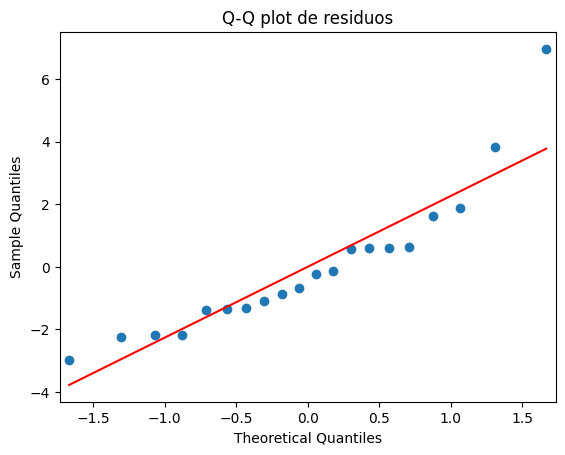

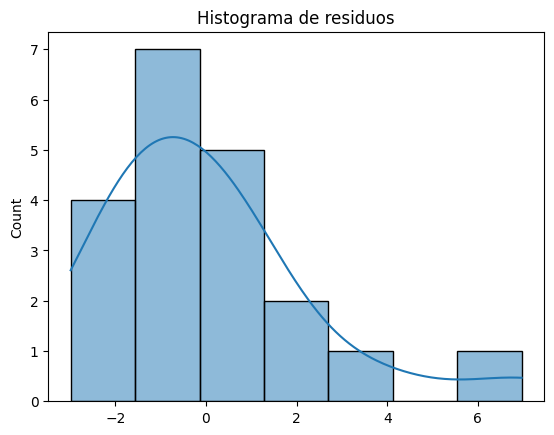

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 10
grupo1 = df10[df10['tratamiento'] == 'Con tratamiento']['porcentaje_cometas']
grupo2 = df10[df10['tratamiento'] == 'Sin tratamiento']['porcentaje_cometas']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.30433662983094306


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
Con tratamiento Sin tratamiento    5.901   0.0  3.66 8.142   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones de Porcentaje de Cometas entre Tratamientos (Tukey)')

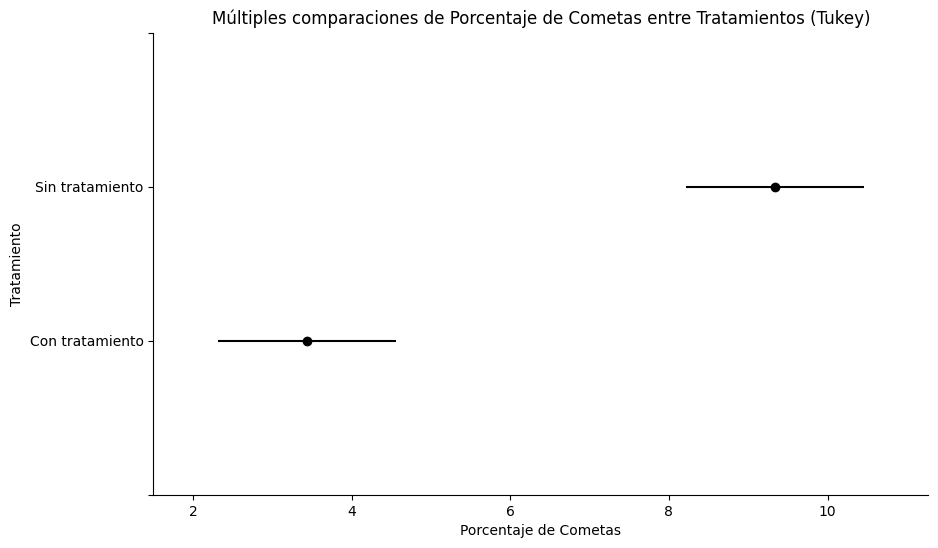

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df10['porcentaje_cometas'], groups=df10['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamiento", xlabel="Porcentaje de Cometas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones de Porcentaje de Cometas entre Tratamientos (Tukey)")

Lambda óptimo: 0.32061169162391906


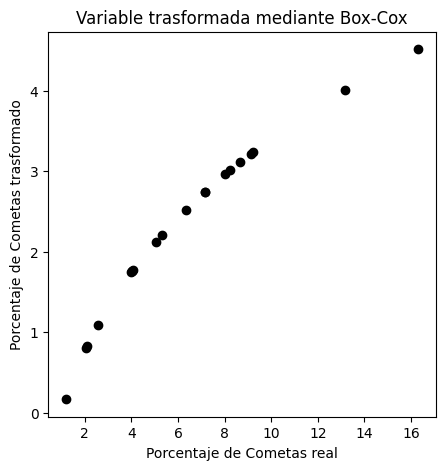

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df10["respuesta_boxcox"], lambda_opt = boxcox(df10["porcentaje_cometas"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df10["porcentaje_cometas"], df10["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Porcentaje de Cometas real")
plt.ylabel("Porcentaje de Cometas trasformado")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: No hay diferencia en el porcentaje de cometas (transformado) entre los tratamientos.
# H1: Hay una diferencia en el porcentaje de cometas (transformado) entre los tratamientos.

# Realizar el modelo ANOVA
modelo_lineal = ols(f'respuesta_boxcox ~ C(tratamiento)', data=df10).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(tratamiento),15.859834,1.0,38.91081,0.000007
Residual,7.336702,18.0,NaN,NaN


valor-p (Shapiro) = 0.9455348310737177


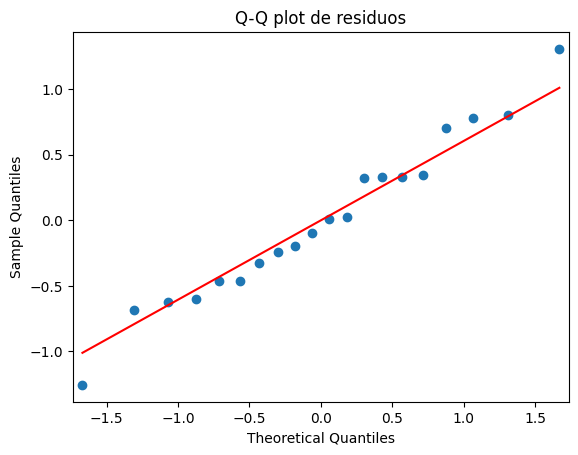

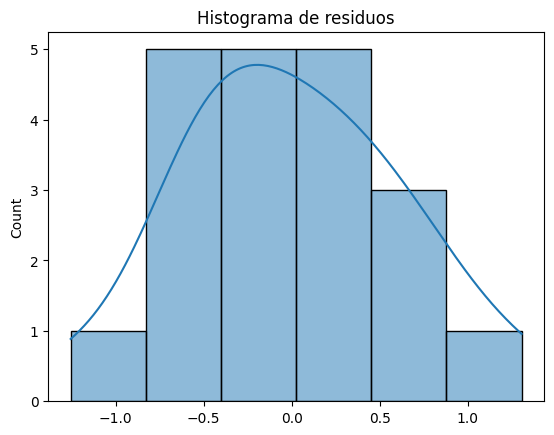

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Mily Díaz de León Márquez
from scipy.stats import levene

# Define groups for Levene's test using the correct DataFrame and column names for problem 10
grupo1 = df10[df10['tratamiento'] == 'Con tratamiento']['respuesta_boxcox']
grupo2 = df10[df10['tratamiento'] == 'Sin tratamiento']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.700897370037938


Lambda óptimo: 0.32061169162391906


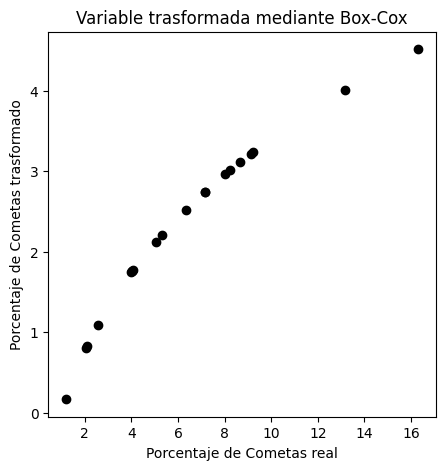

In [ ]:
#Mily Díaz de León Márquez
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df10["respuesta_boxcox"], lambda_opt = boxcox(df10["porcentaje_cometas"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df10["porcentaje_cometas"], df10["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Porcentaje de Cometas real")
plt.ylabel("Porcentaje de Cometas trasformado")
plt.show()

**Conclusión:**
Los resultados evidenciaron diferencias claras entre los dos grupos evaluados. El porcentaje de cometas disminuye de forma notable cuando se aplica el tratamiento, mientras que en la condición sin tratamiento los valores se mantienen consistentemente elevados. Si bien el supuesto de normalidad no se cumplía al inicio, la transformación Box–Cox permitió ajustar el modelo adecuadamente. Posteriormente, la prueba de Tukey confirmó que la diferencia entre ambos grupos es significativamente marcada.

El tratamiento que combina fuerza centrípeta y aire ionizado demuestra ser altamente efectivo para reducir los defectos tipo “cometa”. Su incorporación en el proceso de manufactura de discos ópticos podría disminuir de manera considerable el desperdicio y mejorar la calidad del producto final.